In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
import sys
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.model_selection import train_test_split

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Activation, Conv2D, Reshape, Add, Multiply
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


Training images shape: (536, 256, 256)
Training masks shape: (536, 256, 256, 1)
Validation images shape: (134, 256, 256)
Validation masks shape: (134, 256, 256, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_25[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 128, 128,  │          0 │ conv2d_26[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_8[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_28 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_27[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 64, 64,    │          0 │ conv2d_28[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_29 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_9[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_29[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 32, 32,    │          0 │ conv2d_30[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_10… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_31[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 16, 16,    │          0 │ conv2d_32[0][0]   │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_11… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 16, 16,    │  9,438,208 │ conv2d_33[0][0]   │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_2  │ (None, 32, 32,    │  2,097,664 │ conv2d_34[0][0]   │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 32, 32,    │    262,144 │ conv2d_32[0][0] 

 Total params: 31,735,569 (121.06 MB)

 Trainable params: 31,731,721 (121.05 MB)

 Non-trainable params: 3,848 (15.03 KB)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8564 - accuracy_metric: 0.8564 - dice_coef: 0.2130 - iou_metric: 8.1355e-06 - loss: 0.6571 - precision_metric: 0.8817 - recall_metric: 8.1585e-06   
Epoch 1: val_loss improved from inf to 0.43927, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 217s 4s/step - accuracy: 0.8565 - accuracy_metric: 0.8565 - dice_coef: 0.2123 - iou_metric: 7.9595e-06 - loss: 0.6553 - precision_metric: 0.8843 - recall_metric: 7.9820e-06 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.1000 - val_iou_metric: 9.8603e-13 - val_loss: 0.4393 - val_precision_metric: 1.0000 - val_recall_metric: 9.8603e-13
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.8535 - accuracy_metric: 0.8535 - dice_coef: 0.1545 - iou_metric: 6.7359e-13 - loss: 0.4133 - precision_metric: 1.0000 - recall_metric: 6.7359e-13
Epoch 2: val_loss improved from 0.43927 to 0.36597, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8536 - accuracy_metric: 0.8536 - dice_coef: 0.1549 - iou_metric: 6.7495e-13 - loss: 0.4127 - precision_metric: 1.0000 - recall_metric: 6.7495e-13 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.1263 - val_iou_metric: 9.8603e-13 - val_loss: 0.3660 - val_precision_metric: 1.0000 - val_recall_metric: 9.8603e-13
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.8513 - accuracy_metric: 0.8513 - dice_coef: 0.2899 - iou_metric: 6.6923e-13 - loss: 0.3102 - precision_metric: 1.0000 - recall_metric: 6.6923e-13
Epoch 3: val_loss improved from 0.36597 to 0.31789, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8515 - accuracy_metric: 0.8514 - dice_coef: 0.2908 - iou_metric: 6.7011e-13 - loss: 0.3094 - precision_metric: 1.0000 - recall_metric: 6.7011e-13 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.2430 - val_iou_metric: 9.8603e-13 - val_loss: 0.3179 - val_precision_metric: 1.0000 - val_recall_metric: 9.8603e-13
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.8597 - accuracy_metric: 0.8597 - dice_coef: 0.3950 - iou_metric: 2.1919e-08 - loss: 0.2448 - precision_metric: 1.0000 - recall_metric: 2.1919e-08
Epoch 4: val_loss improved from 0.31789 to 0.28740, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8596 - accuracy_metric: 0.8596 - dice_coef: 0.3960 - iou_metric: 4.2584e-08 - loss: 0.2443 - precision_metric: 1.0000 - recall_metric: 4.2584e-08 - val_accuracy: 0.8773 - val_accuracy_metric: 0.8790 - val_dice_coef: 0.2663 - val_iou_metric: 9.8603e-13 - val_loss: 0.2874 - val_precision_metric: 1.0000 - val_recall_metric: 9.8603e-13
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.9058 - accuracy_metric: 0.9058 - dice_coef: 0.4861 - iou_metric: 0.3846 - loss: 0.1969 - precision_metric: 0.8621 - recall_metric: 0.4321
Epoch 5: val_loss did not improve from 0.28740
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9063 - accuracy_metric: 0.9062 - dice_coef: 0.4873 - iou_metric: 0.3884 - loss: 0.1965 - precision_metric: 0.8611 - recall_metric: 0.4371 - val_accuracy: 0.8960 - val_accuracy_metric: 0.8978 - val_dice_coef: 0.3281 - val_iou_metric: 0.1966 - val_loss: 0.3208 - val_precision_metric: 0.8043 - val_recall_metric

34/34 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9236 - accuracy_metric: 0.9236 - dice_coef: 0.6008 - iou_metric: 0.5865 - loss: 0.1927 - precision_metric: 0.7821 - recall_metric: 0.7346 - val_accuracy: 0.8861 - val_accuracy_metric: 0.8878 - val_dice_coef: 0.3009 - val_iou_metric: 0.0757 - val_loss: 0.2660 - val_precision_metric: 0.9793 - val_recall_metric: 0.0758
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9463 - accuracy_metric: 0.9463 - dice_coef: 0.7273 - iou_metric: 0.6861 - loss: 0.1335 - precision_metric: 0.8283 - recall_metric: 0.8067
Epoch 7: val_loss improved from 0.26600 to 0.24690, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.9464 - accuracy_metric: 0.9464 - dice_coef: 0.7274 - iou_metric: 0.6865 - loss: 0.1334 - precision_metric: 0.8284 - recall_metric: 0.8071 - val_accuracy: 0.8872 - val_accuracy_metric: 0.8887 - val_dice_coef: 0.3208 - val_iou_metric: 0.0831 - val_loss: 0.2469 - val_precision_metric: 0.9758 - val_recall_metric: 0.0833
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 883ms/step - accuracy: 0.9554 - accuracy_metric: 0.9554 - dice_coef: 0.7590 - iou_metric: 0.7219 - loss: 0.1124 - precision_metric: 0.8550 - recall_metric: 0.8290
Epoch 8: val_loss did not improve from 0.24690
34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9553 - accuracy_metric: 0.9553 - dice_coef: 0.7588 - iou_metric: 0.7215 - loss: 0.1126 - precision_metric: 0.8549 - recall_metric: 0.8287 - val_accuracy: 0.8851 - val_accuracy_metric: 0.8868 - val_dice_coef: 0.3059 - val_iou_metric: 0.0655 - val_loss: 0.2563 - val_precision_metric: 0.9934 - val_recall_metric: 0.0656
Epoch 9

34/34 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9534 - accuracy_metric: 0.9534 - dice_coef: 0.7477 - iou_metric: 0.7218 - loss: 0.1165 - precision_metric: 0.8360 - recall_metric: 0.8449 - val_accuracy: 0.9042 - val_accuracy_metric: 0.9055 - val_dice_coef: 0.4300 - val_iou_metric: 0.2294 - val_loss: 0.2126 - val_precision_metric: 0.9515 - val_recall_metric: 0.2324
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.9568 - accuracy_metric: 0.9568 - dice_coef: 0.7755 - iou_metric: 0.7359 - loss: 0.1068 - precision_metric: 0.8462 - recall_metric: 0.8525
Epoch 10: val_loss improved from 0.21260 to 0.19141, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9568 - accuracy_metric: 0.9568 - dice_coef: 0.7757 - iou_metric: 0.7361 - loss: 0.1067 - precision_metric: 0.8463 - recall_metric: 0.8526 - val_accuracy: 0.9101 - val_accuracy_metric: 0.9112 - val_dice_coef: 0.4733 - val_iou_metric: 0.2788 - val_loss: 0.1914 - val_precision_metric: 0.9447 - val_recall_metric: 0.2840
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 886ms/step - accuracy: 0.9597 - accuracy_metric: 0.9597 - dice_coef: 0.7886 - iou_metric: 0.7495 - loss: 0.1007 - precision_metric: 0.8722 - recall_metric: 0.8462
Epoch 11: val_loss improved from 0.19141 to 0.18247, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9596 - accuracy_metric: 0.9596 - dice_coef: 0.7885 - iou_metric: 0.7494 - loss: 0.1008 - precision_metric: 0.8719 - recall_metric: 0.8463 - val_accuracy: 0.9206 - val_accuracy_metric: 0.9219 - val_dice_coef: 0.5250 - val_iou_metric: 0.3773 - val_loss: 0.1825 - val_precision_metric: 0.9182 - val_recall_metric: 0.3918
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.9630 - accuracy_metric: 0.9630 - dice_coef: 0.8031 - iou_metric: 0.7645 - loss: 0.0928 - precision_metric: 0.8649 - recall_metric: 0.8724
Epoch 12: val_loss improved from 0.18247 to 0.12215, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9629 - accuracy_metric: 0.9629 - dice_coef: 0.8030 - iou_metric: 0.7644 - loss: 0.0929 - precision_metric: 0.8649 - recall_metric: 0.8723 - val_accuracy: 0.9474 - val_accuracy_metric: 0.9477 - val_dice_coef: 0.6481 - val_iou_metric: 0.5997 - val_loss: 0.1221 - val_precision_metric: 0.8971 - val_recall_metric: 0.6477
Epoch 13/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.9609 - accuracy_metric: 0.9609 - dice_coef: 0.8000 - iou_metric: 0.7605 - loss: 0.0992 - precision_metric: 0.8742 - recall_metric: 0.8560
Epoch 13: val_loss did not improve from 0.12215
34/34 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9609 - accuracy_metric: 0.9609 - dice_coef: 0.8000 - iou_metric: 0.7606 - loss: 0.0991 - precision_metric: 0.8742 - recall_metric: 0.8561 - val_accuracy: 0.9538 - val_accuracy_metric: 0.9549 - val_dice_coef: 0.6593 - val_iou_metric: 0.6929 - val_loss: 0.1317 - val_precision_metric: 0.8126 - val_recall_metric: 0.8301
Epoch

34/34 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9621 - accuracy_metric: 0.9621 - dice_coef: 0.8109 - iou_metric: 0.7684 - loss: 0.0930 - precision_metric: 0.8765 - recall_metric: 0.8663 - val_accuracy: 0.9517 - val_accuracy_metric: 0.9512 - val_dice_coef: 0.6802 - val_iou_metric: 0.6066 - val_loss: 0.1094 - val_precision_metric: 0.9574 - val_recall_metric: 0.6243
Epoch 16/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.9602 - accuracy_metric: 0.9602 - dice_coef: 0.7937 - iou_metric: 0.7516 - loss: 0.1003 - precision_metric: 0.8852 - recall_metric: 0.8364
Epoch 16: val_loss did not improve from 0.10936
34/34 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9602 - accuracy_metric: 0.9602 - dice_coef: 0.7940 - iou_metric: 0.7519 - loss: 0.1002 - precision_metric: 0.8851 - recall_metric: 0.8369 - val_accuracy: 0.9549 - val_accuracy_metric: 0.9558 - val_dice_coef: 0.6908 - val_iou_metric: 0.6895 - val_loss: 0.1169 - val_precision_metric: 0.8412 - val_recall_metric: 0.7967
Epoch

34/34 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9654 - accuracy_metric: 0.9654 - dice_coef: 0.8116 - iou_metric: 0.7714 - loss: 0.0851 - precision_metric: 0.8658 - recall_metric: 0.8776 - val_accuracy: 0.9597 - val_accuracy_metric: 0.9604 - val_dice_coef: 0.7309 - val_iou_metric: 0.7333 - val_loss: 0.1067 - val_precision_metric: 0.8237 - val_recall_metric: 0.8729
Epoch 19/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.9648 - accuracy_metric: 0.9648 - dice_coef: 0.8127 - iou_metric: 0.7762 - loss: 0.0887 - precision_metric: 0.8656 - recall_metric: 0.8874
Epoch 19: val_loss improved from 0.10668 to 0.07986, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9647 - accuracy_metric: 0.9647 - dice_coef: 0.8128 - iou_metric: 0.7763 - loss: 0.0887 - precision_metric: 0.8659 - recall_metric: 0.8872 - val_accuracy: 0.9663 - val_accuracy_metric: 0.9664 - val_dice_coef: 0.7797 - val_iou_metric: 0.7530 - val_loss: 0.0799 - val_precision_metric: 0.8920 - val_recall_metric: 0.8307
Epoch 20/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 885ms/step - accuracy: 0.9634 - accuracy_metric: 0.9634 - dice_coef: 0.8165 - iou_metric: 0.7741 - loss: 0.0901 - precision_metric: 0.8837 - recall_metric: 0.8651
Epoch 20: val_loss improved from 0.07986 to 0.07670, saving model to attention_unet_dsb18.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9634 - accuracy_metric: 0.9634 - dice_coef: 0.8164 - iou_metric: 0.7740 - loss: 0.0900 - precision_metric: 0.8835 - recall_metric: 0.8652 - val_accuracy: 0.9678 - val_accuracy_metric: 0.9679 - val_dice_coef: 0.8035 - val_iou_metric: 0.7763 - val_loss: 0.0767 - val_precision_metric: 0.8436 - val_recall_metric: 0.9077

--- Evaluating the Model ---
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 509ms/step - accuracy: 0.9679 - accuracy_metric: 0.9679 - dice_coef: 0.8041 - iou_metric: 0.7749 - loss: 0.0773 - precision_metric: 0.8372 - recall_metric: 0.9134
Validation Loss: 0.0767
Validation Accuracy: 0.9678
Validation IoU: 0.7688
Validation Dice Coefficient: 0.7972
Validation Precision: 0.8447
Validation Recall: 0.8967
Validation Overall Accuracy: 0.9680

--- Visualizing Predictions on Validation Set ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 

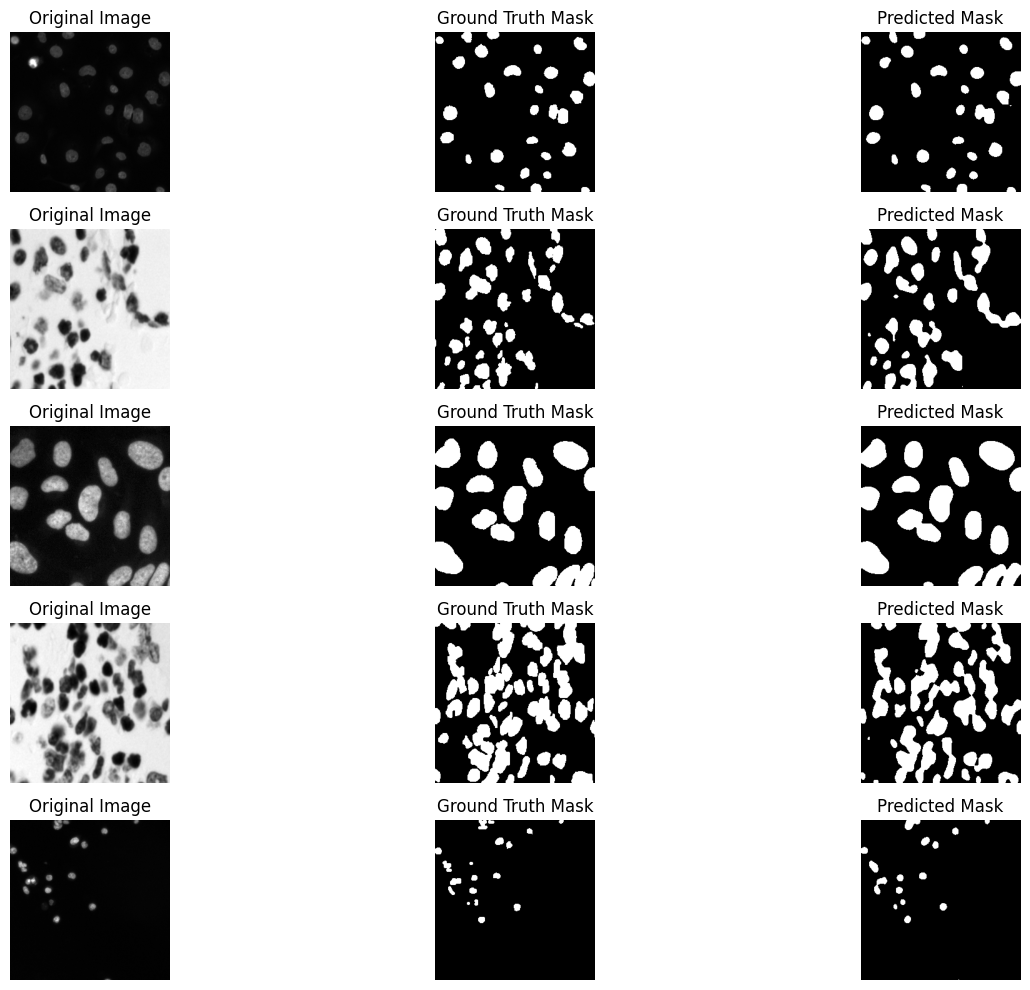

In [7]:
# --- Data Paths ---
DATA_DIR = '/content/drive/MyDrive' # Adjust this to your main dataset directory
TRAIN_IMG_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/all_images'
TRAIN_MASK_DIR = '/content/drive/MyDrive/NucleiSegmentation/NucleiSegmentationDataset/merged_masks'


# --- Parameters ---
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 1 # Assuming grayscale images, change to 3 for RGB
NUM_CLASSES = 1 # Binary segmentation (nuclei vs. background)
BATCH_SIZE = 16
EPOCHS = 20
LEARNING_RATE = 1e-4
VALIDATION_SPLIT = 0.2 # Percentage of training data to use for validation

# --- Helper Functions ---
def load_data(img_dir, mask_dir, img_height, img_width, channels):
    images = []
    masks = []
    img_filenames = sorted(os.listdir(img_dir))
    mask_filenames = sorted(os.listdir(mask_dir))

    for img_file, mask_file in zip(img_filenames, mask_filenames):
        if not img_file.startswith('.') and not mask_file.startswith('.'):
            img_path = os.path.join(img_dir, img_file)
            mask_path = os.path.join(mask_dir, mask_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if channels == 1 else cv2.IMREAD_COLOR)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if img is not None and mask is not None:
                img = cv2.resize(img, (img_width, img_height))
                mask = cv2.resize(mask, (img_width, img_height), interpolation=cv2.INTER_NEAREST) # Keep binary nature

                img = img / 255.0
                mask = mask / 255.0
                mask = np.expand_dims(mask, axis=-1) # Add channel dimension

                images.append(img)
                masks.append(mask)

    return np.array(images, dtype=np.float32), np.array(masks, dtype=np.float32)

# Load all training data
X, Y = load_data(TRAIN_IMG_DIR, TRAIN_MASK_DIR, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=VALIDATION_SPLIT, random_state=42) # You can change the random_state for different splits

print(f"Training images shape: {X_train.shape}")
print(f"Training masks shape: {Y_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation masks shape: {Y_val.shape}")

# --- Attention U-Net Model ---
def attention_block(x, skip, filters):
    g = Conv2D(filters, 1, use_bias=False)(skip)
    g = BatchNormalization()(g)
    x = Conv2D(filters, 1, use_bias=False)(x)
    x = BatchNormalization()(x)
    psi = Activation('relu')(Add()([g, x]))
    psi = Conv2D(1, 1, use_bias=False)(psi)
    psi = BatchNormalization()(psi)
    psi = Activation('sigmoid')(psi)
    return Multiply()([skip, psi]) # Apply attention to the input feature map (adjust if needed)

def upsampling_block(input_tensor, skip_tensor, filters):
    up = Conv2DTranspose(filters, 2, strides=(2, 2), padding='same')(input_tensor)
    attention = attention_block(up, skip_tensor, filters)
    merged = concatenate([up, attention], axis=3)
    conv1 = Conv2D(filters, 3, activation='relu', padding='same')(merged)
    conv1 = Conv2D(filters, 3, activation='relu', padding='same')(conv1)
    return conv1

def attention_unet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES):
    inputs = Input(shape=input_shape)

    # Contracting Path
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)

    # Expanding Path with Attention Gates
    up6 = upsampling_block(conv5, conv4, 512)
    up7 = upsampling_block(up6, conv3, 256)
    up8 = upsampling_block(up7, conv2, 128)
    up9 = upsampling_block(up8, conv1, 64)

    outputs = Conv2D(num_classes, 1, activation='sigmoid')(up9)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the Attention U-Net model
model = attention_unet(input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), num_classes=NUM_CLASSES)

# --- Metrics ---
def iou_metric(y_true, y_pred):
    intersection = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    union = K.sum(K.round(K.clip(y_true, 0, 1))) + K.sum(K.round(K.clip(y_pred, 0, 1))) - intersection
    iou = K.mean((intersection + K.epsilon()) / (union + K.epsilon()))
    return iou

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + K.epsilon()) / (K.sum(y_true_f) + K.sum(y_pred_f) + K.epsilon())

def precision_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = (true_positives + K.epsilon()) / (predicted_positives + K.epsilon())
    return precision

def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    actual_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = (true_positives + K.epsilon()) / (actual_positives + K.epsilon())
    return recall

def accuracy_metric(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

# Compile the model with added metrics
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='binary_crossentropy',
              metrics=['accuracy', iou_metric, dice_coef, precision_metric, recall_metric, accuracy_metric])

model.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('attention_unet_dsb18.h5', monitor='val_loss', save_best_only=True, verbose=1)

# --- Train the Model ---
history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[early_stopping, model_checkpoint])

# --- Evaluate the Model ---
print("\n--- Evaluating the Model ---")
loss, accuracy, iou, dice, precision, recall, overall_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation IoU: {iou:.4f}")
print(f"Validation Dice Coefficient: {dice:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation Overall Accuracy: {overall_accuracy:.4f}")

# --- Visualize Predictions ---
print("\n--- Visualizing Predictions on Validation Set ---")
n_samples = 5
indices = np.random.choice(len(X_val), n_samples, replace=False)

plt.figure(figsize=(15, 10))
for i, index in enumerate(indices):
    img = X_val[index]
    mask = Y_val[index]
    pred_mask = model.predict(np.expand_dims(img, axis=0))[0]
    pred_mask = (pred_mask > 0.5).astype(np.uint8) # Threshold the prediction

    plt.subplot(n_samples, 3, i * 3 + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 2)
    plt.imshow(mask.squeeze(), cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(n_samples, 3, i * 3 + 3)
    plt.imshow(pred_mask.squeeze(), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()

# --- Optional: Save the trained model ---
# model.save('attention_unet_dsb18_trained.h5')
# print("Trained model saved as attention_unet_dsb18_trained.h5")